In [1]:
# Importing key libraries
import pandas as pd
import numpy as np

import seaborn as sns 

import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

from colorama import Fore, Back , Style

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

# Loading data

In [2]:
# Loading the dataset (csv topython ready dataset)
day = pd.read_csv(r"C:\Users\HP\Downloads\day.csv")

# Reading and understanding data

In [3]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Analyzing the data

In [4]:
# Exploring the dataset 

#checking the shape
print("Dataframe shape :" ,day.shape)

# checking the coulmns info
print(day.info())


# checking the outer most idea about data by describing
print(Fore.BLUE + "Describing the Data frame")
print(day.describe())


# checking the datatypes 
print(Fore.RED + "Describing the Datatypes")
print(day.dtypes)

Dataframe shape : (730, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
Describing the Data frame
          instant      season     

In [5]:
# checking for the null values in column data

print(day.isnull().sum())
print('There are no null values in any column')

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
There are no null values in any column


## Dropping unwanted columns and Rows 

In [6]:
# dropping the duplicates
# Also there are no non null rows
day.drop_duplicates(inplace=True)


In [7]:
print(day.shape)

(730, 16)


There are no duplicates as the shape remains same

In [8]:
# Now checking the columns that are not required and dropping them.
# casual and registered are not required as cnt could be used.

day.drop(['casual','registered'],axis=1,inplace=True)

# instant only givesthe index which is not required so we can drop it also.
day.drop(['instant'],axis=1,inplace=True)

In [9]:
# dteday is not needed as we have month and year columns.
day.drop(['dteday'],axis=1,inplace=True)

In [10]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting the int to strings in required columns

In [11]:
# mapping the season column
day.season = day.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


# mapping the month column
day.mnth = day.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

#mapping the weekday column
day.weekday = day.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# mapping the weathersit column
day.weathersit = day.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [12]:
# Checking the data after correction
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


As cnt is the count of total rental bikes including both casual and registered this is the target variable as we have to 
notice the change in count as  all the other variables change and find the significant variables.


In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


#  Visualising the data

### plotting the numerical columns

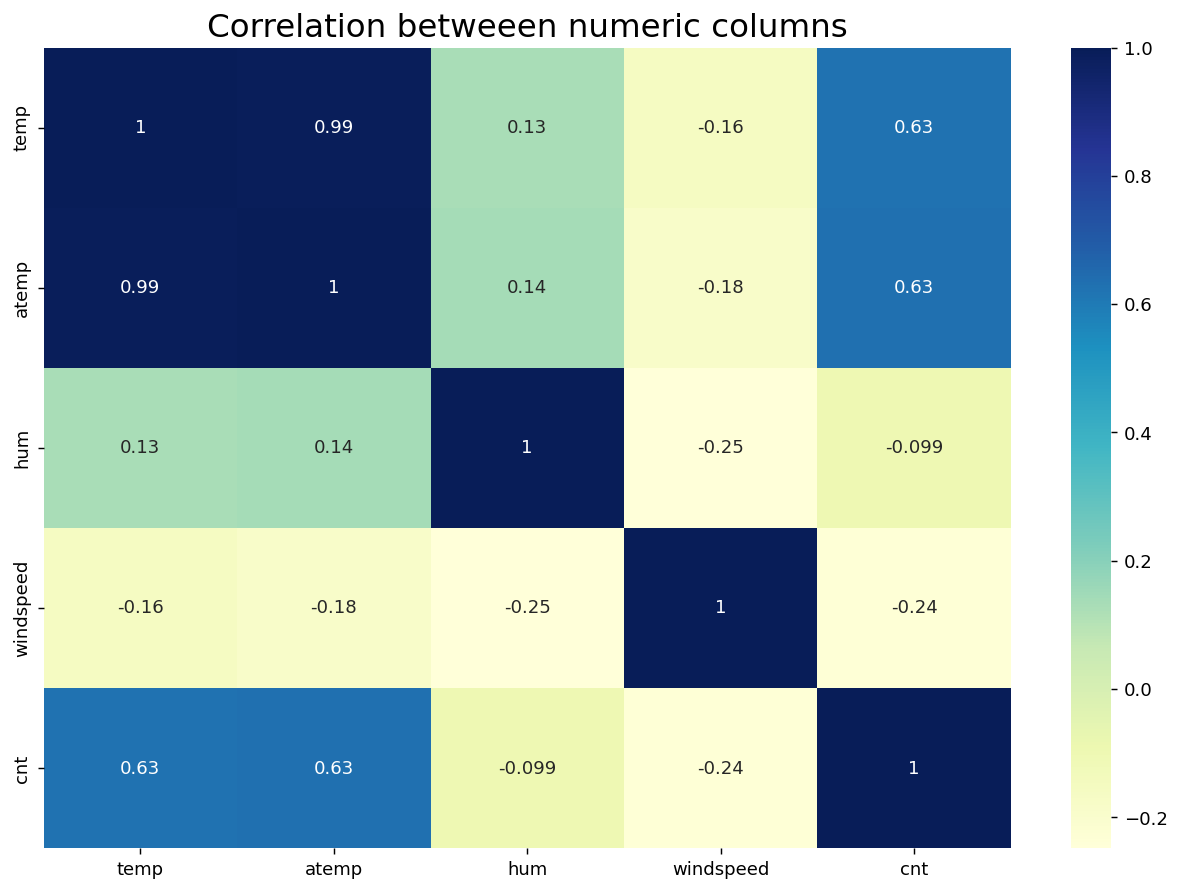

In [14]:
num_cols = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(12,8),dpi=130)
plt.title("Correlation betweeen numeric columns",fontsize=18)
sns.heatmap(day[num_cols].corr(),annot= True,cmap="YlGnBu")
plt.show()

<Figure size 1500x3000 with 0 Axes>

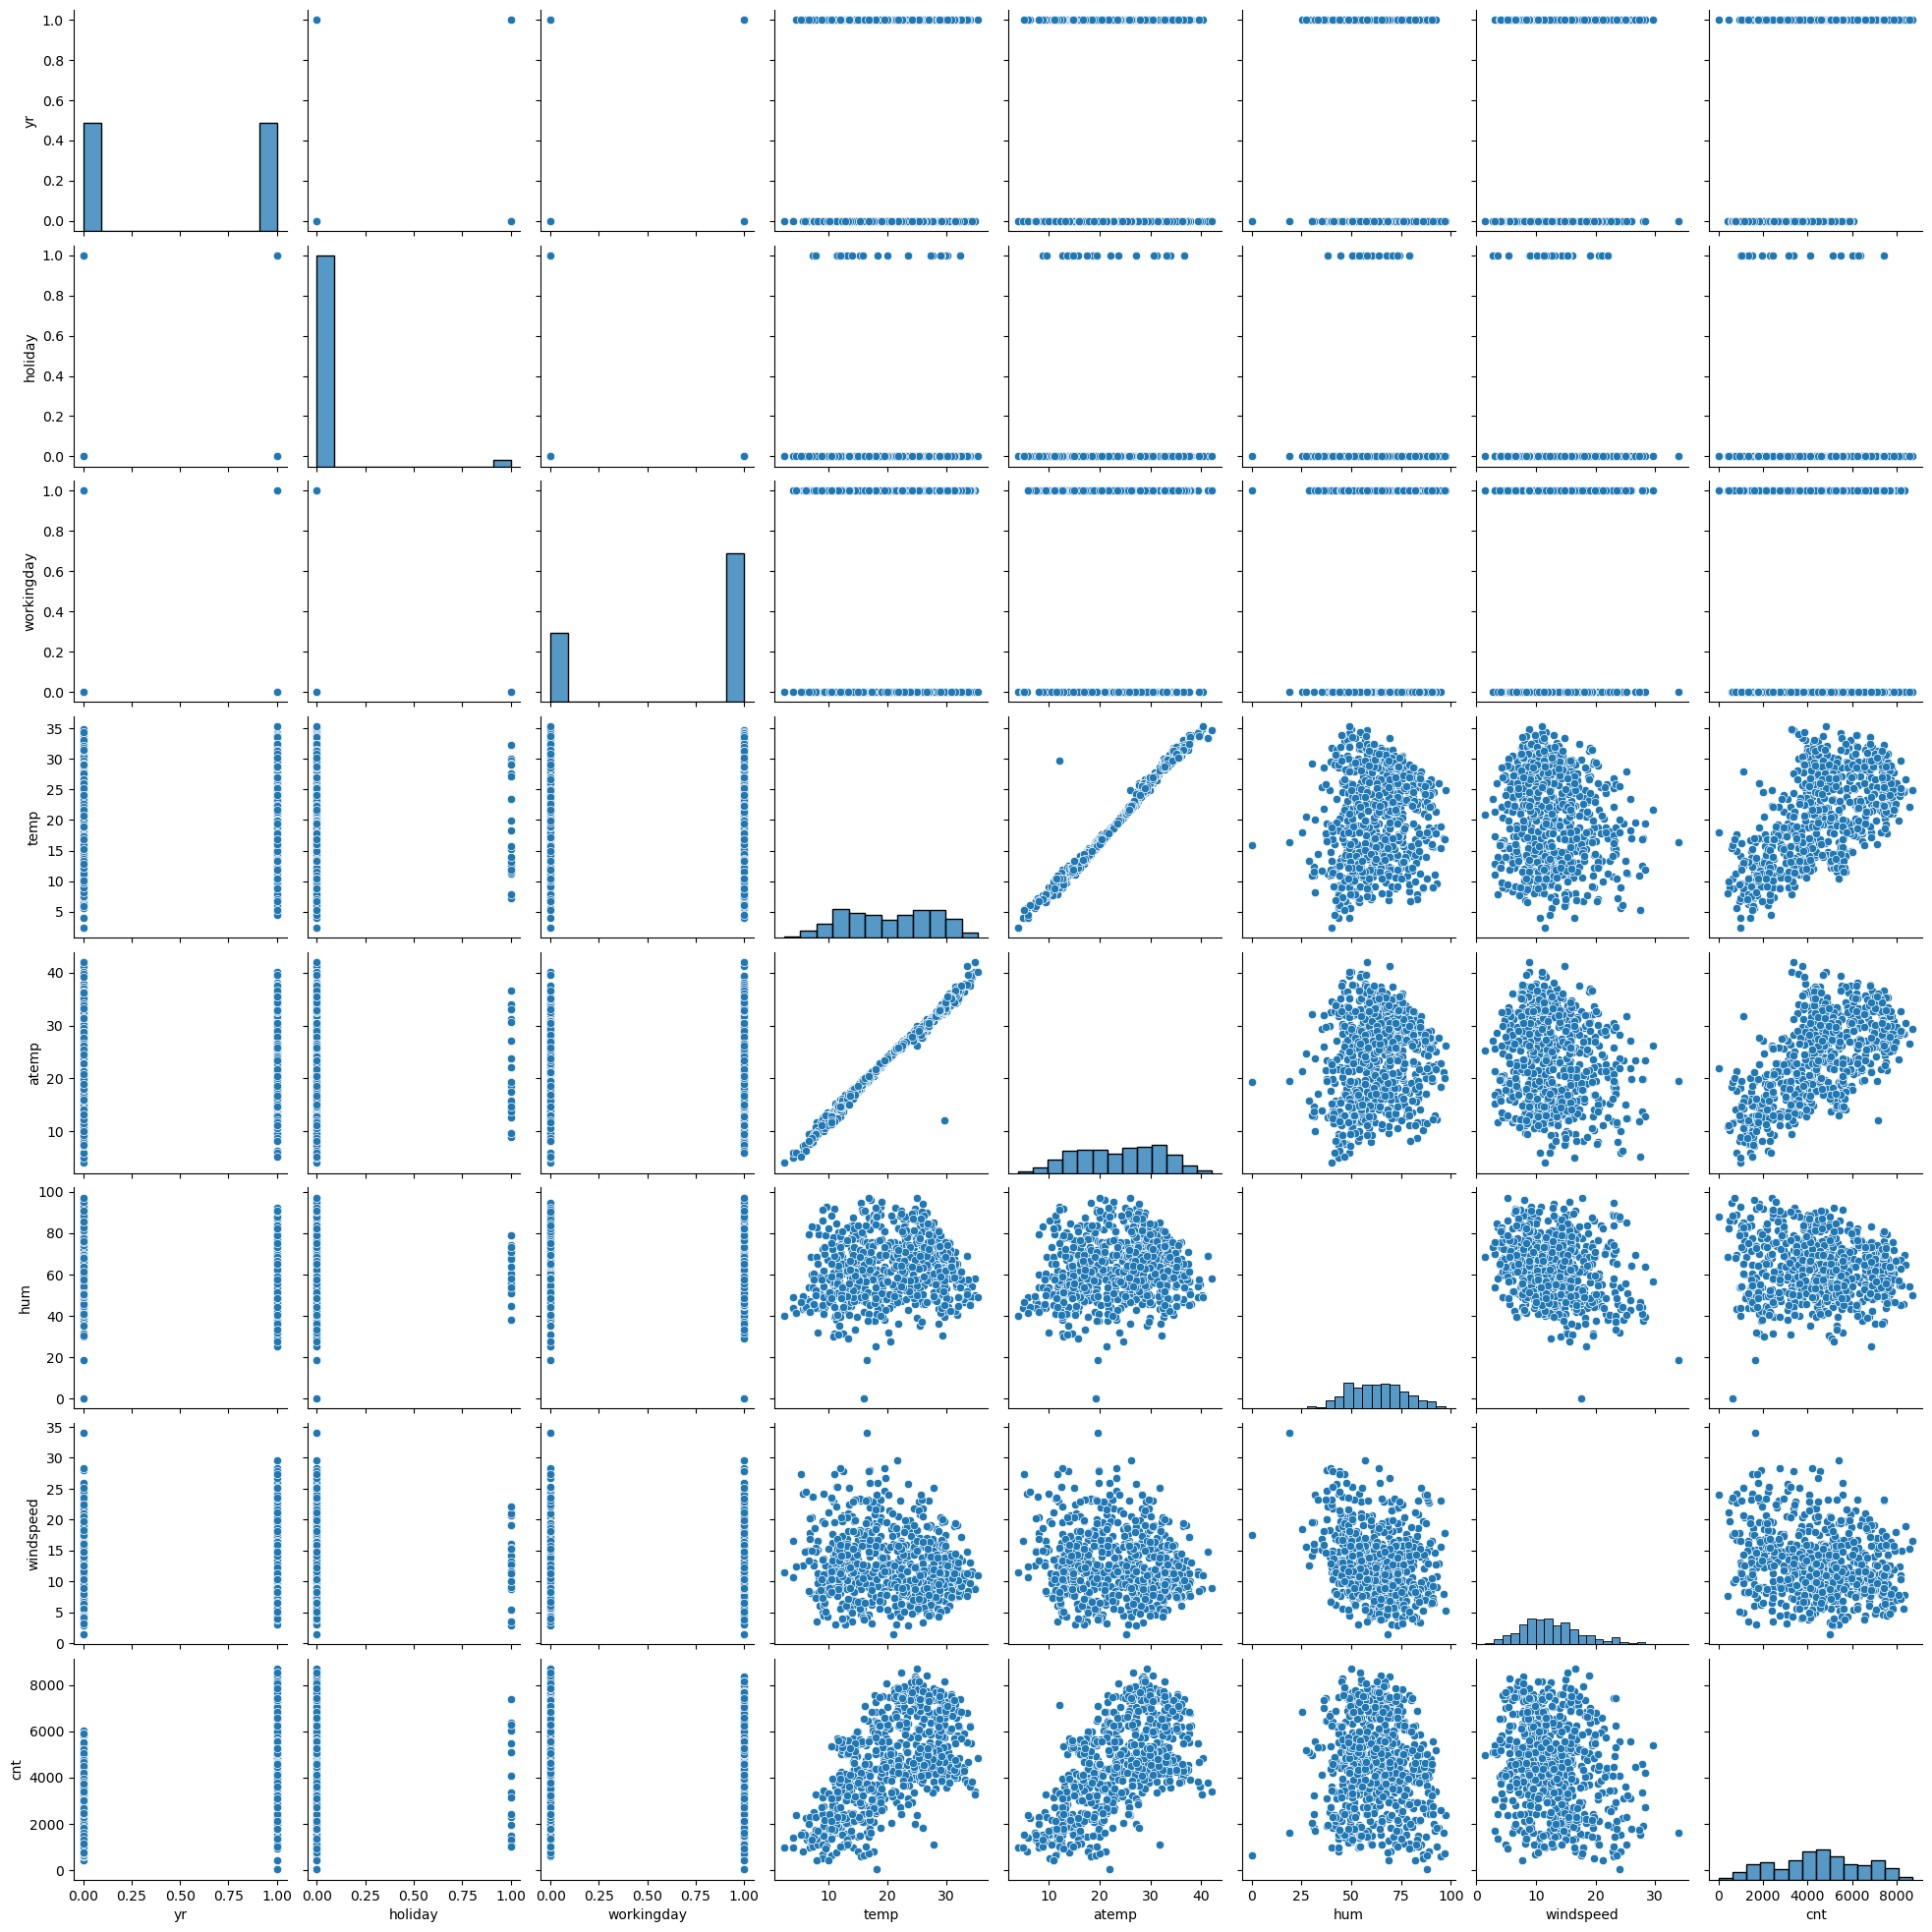

In [15]:
plt.figure(figsize = (15,30))
sns.pairplot(data=day)
plt.show()

### plotting the categorical columns

<Axes: xlabel='weathersit', ylabel='cnt'>

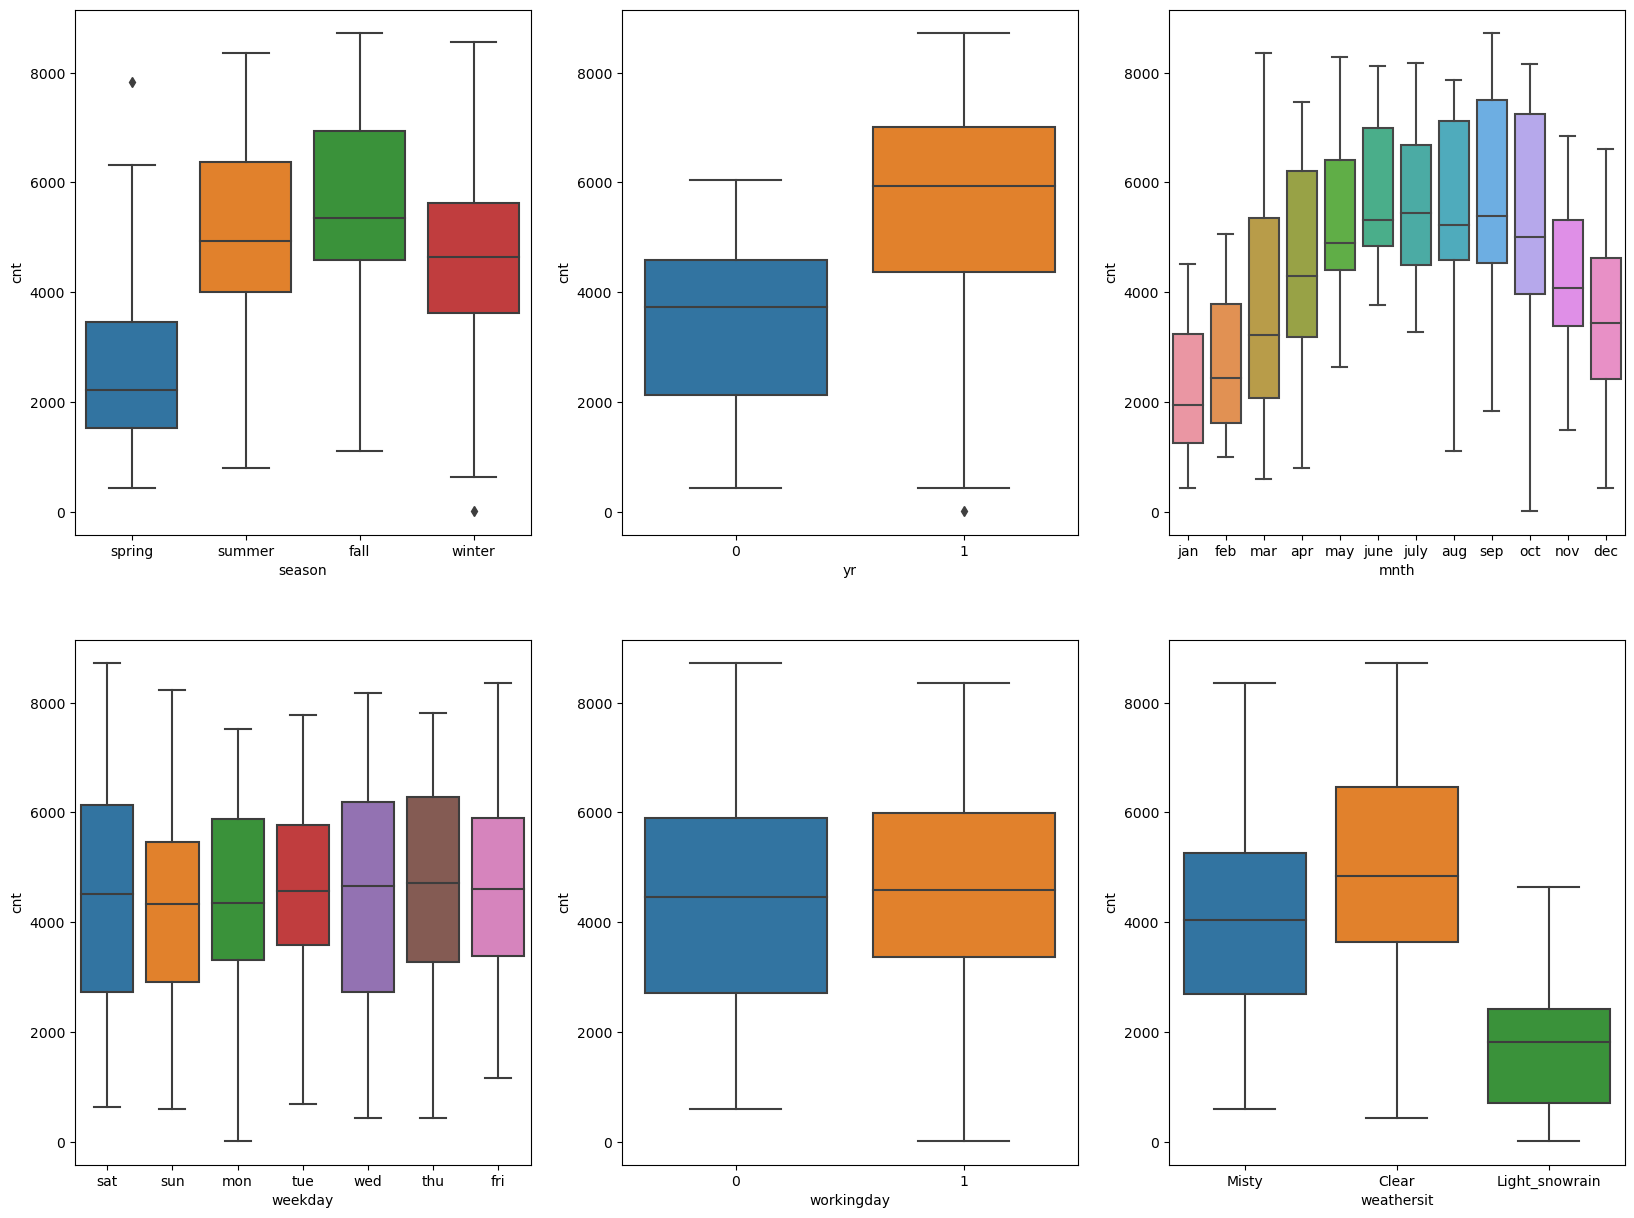

In [16]:
plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=day)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=day)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=day)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=day)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=day)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=day)

# Preparing data for modelling

In [17]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


# Creating dummy variables 

In [18]:
# Dummy variable creation for month, weekday, weathersit and season

months =pd.get_dummies(day.mnth,drop_first=True)
weekdays =pd.get_dummies(day.weekday,drop_first=True)
weathersits =pd.get_dummies(day.weathersit,drop_first=True)
seasons =pd.get_dummies(day.season,drop_first=True)

In [19]:
# Merging  the dataframe, with the dummy variable dataset. 
dayy = pd.concat([day,months,weekdays,weathersits,seasons],axis=1)

In [20]:
# checking the data head
dayy.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [21]:
#checking all the columns after combining the dummy variables into dataset
dayy.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'aug', 'dec',
       'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty', 'spring',
       'summer', 'winter'],
      dtype='object')

In [22]:
# dropping unnecessary columns as we have already created dummy variable out of it.

dayy.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [23]:
# checking haed of new dataframe after dropping
dayy.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [24]:
dayy.shape

(730, 30)

In [25]:
dayy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin

## Splitting into train-test-set

In [26]:
df_train,df_test = train_test_split(dayy, train_size =0.7 , test_size =0.3, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


# Rescaling the features
Normalisation : (x-xmin)/(xmax-xmin) (Converts the data between 0 and 1)

In [27]:
# 1.create or instantiate an object.
scaler = MinMaxScaler()

# create the list of numerical variables.
num_vars = ['temp','atemp','hum','windspeed','cnt']


print('here we can see that all the values are between 0 and 1')

# 2.fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

here we can see that all the values are between 0 and 1


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


# Training the model.

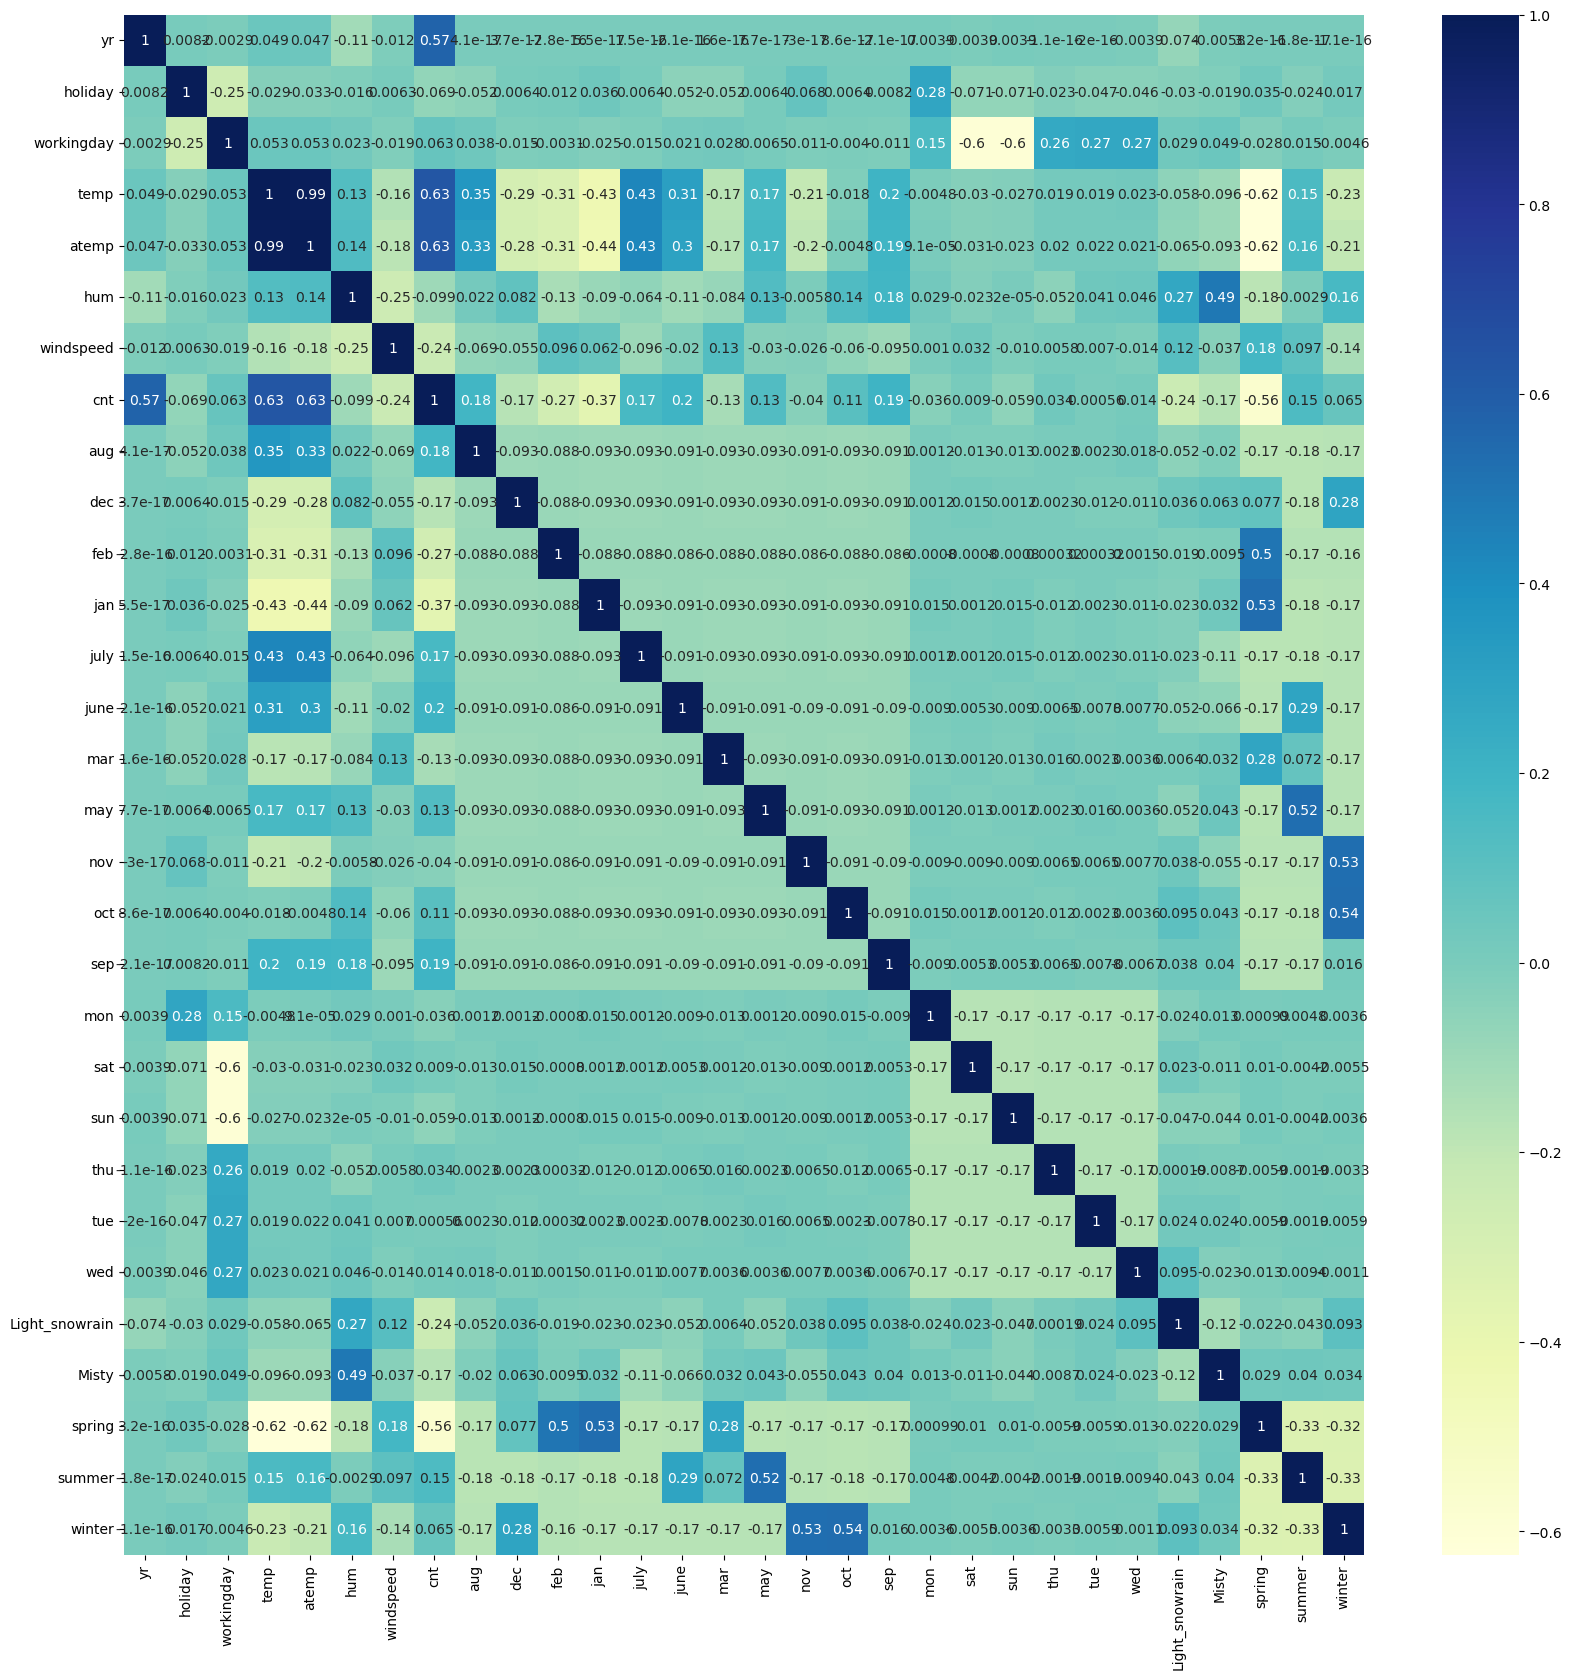

In [28]:
# heatmap 
plt.figure(figsize = (20,20))
sns.heatmap(dayy.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [29]:
y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [31]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,aug,dec,feb,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,0,0,1,0,1,0


# RFE (Recursive feature elimination)


In [32]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [33]:
#Cut down number of features to 15
rfe = RFE(lr,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [34]:
list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 8),
 ('dec', False, 4),
 ('feb', False, 5),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 14),
 ('may', False, 7),
 ('nov', False, 3),
 ('oct', False, 10),
 ('sep', True, 1),
 ('mon', False, 15),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 9),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [35]:
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'july',
       'sep', 'sat', 'sun', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'jan', 'june', 'mar', 'may', 'nov', 'oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

# Building model using statsmodel, for detailed statistics¶

### Building first linear regression mode

In [37]:
# creating X train dataframe with rfe selected variables
X_train_rfe = X_train[col]

In [38]:
#adding a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [39]:
lm= sm.OLS(y_train,X_train_rfe).fit()   # running the linear model

In [40]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        19:01:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1989      0.028      7.

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X= X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,0.00
1,yr,1.03
2,holiday,inf
3,workingday,inf
4,temp,3.62
5,hum,1.91
6,windspeed,1.20
7,july,1.49
8,sep,1.30
9,sat,inf


In [42]:
# workingday is in insignificant in presence of other variables as has quite high vif.
# dropping workingday
X_train_new= X_train_rfe.drop(["workingday"], axis=1)

### Building second linear regression model.

In [43]:
# adding a constant variable
X_train_lm1 = sm.add_constant(X_train_new)

In [44]:
lm1= sm.OLS(y_train,X_train_lm1).fit()   # running the linear model

In [45]:
# lets print summary
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.13e-191
Time:                        19:01:27   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2826      0.034      8.

In [46]:
vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,74.93
1,yr,1.03
2,holiday,1.03
3,temp,3.62
4,hum,1.91
5,windspeed,1.20
6,july,1.49
7,sep,1.30
8,sat,1.05
9,sun,1.05


In [47]:
# We can drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

### Building third linear regression model.

In [48]:
# adding a constant variable
X_train_lm2 = sm.add_constant(X_train_new)

In [49]:
lm2= sm.OLS(y_train,X_train_lm2).fit()   # running the linear model

In [50]:
# lets print summary
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          1.13e-192
Time:                        19:01:28   Log-Likelihood:                 517.45
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     496   BIC:                            -947.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2852      0.034      8.

In [51]:
vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,74.38
1,yr,1.03
2,holiday,1.02
3,temp,3.61
4,hum,1.91
5,windspeed,1.19
6,july,1.49
7,sep,1.30
8,sun,1.02
9,Light_snowrain,1.25


In [52]:
# spring is in insignificant in presence of other variables and has quite high vif.
# dropping workingday
X_train_new= X_train_new.drop(["spring"], axis=1)

### Building fourth linear regression model.

In [53]:
# adding a constant variable
X_train_lm3 = sm.add_constant(X_train_new)

In [54]:
lm3= sm.OLS(y_train,X_train_lm3).fit()   # running the linear model

In [55]:
# lets print summary
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.6
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.66e-192
Time:                        19:01:28   Log-Likelihood:                 513.75
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2277      0.027      8.

In [56]:
vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,45.00
1,yr,1.03
2,holiday,1.02
3,temp,1.60
4,hum,1.88
5,windspeed,1.18
6,july,1.43
7,sep,1.19
8,sun,1.02
9,Light_snowrain,1.24


In [57]:
# july is in insignificant in presence of other variables and has  high vif.
# dropping july
X_train_new= X_train_new.drop(["july"], axis=1)

### Building fifth linear regression model.

In [58]:
# adding a constant variable
X_train_lm4 = sm.add_constant(X_train_new)

In [59]:
lm4= sm.OLS(y_train,X_train_lm4).fit()   # running the linear model

In [60]:
# lets print summary
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.9
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          4.02e-192
Time:                        19:01:28   Log-Likelihood:                 510.47
No. Observations:                 510   AIC:                            -996.9
Df Residuals:                     498   BIC:                            -946.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2277      0.027      8.

In [61]:
vif = pd.DataFrame()
X= X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,45.00
1,yr,1.03
2,holiday,1.02
3,temp,1.27
4,hum,1.87
5,windspeed,1.18
6,sep,1.12
7,sun,1.02
8,Light_snowrain,1.24
9,Misty,1.56


### Building sixth linear regression model.

In [62]:
# dropping humidity as has a high vif
X_train_n = X_train_new.drop(["hum"], axis=1)

In [63]:
# adding a constant variable
X_train_lm5 = sm.add_constant(X_train_n)

In [64]:
lm5= sm.OLS(y_train,X_train_lm5).fit()   # running the linear model

In [65]:
# lets print summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.88e-189
Time:                        19:01:28   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1350      0.017      8.

In [66]:
vif = pd.DataFrame()
X= X_train_n
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,const,16.74
1,yr,1.02
2,holiday,1.02
3,temp,1.20
4,windspeed,1.09
5,sep,1.11
6,sun,1.01
7,Light_snowrain,1.05
8,Misty,1.04
9,summer,1.19


Here VIF seems to be almost accepted. p-value for all the features is 
0.0 and R2 is 0.83 Hence we finalize this model to use further

F-Statistics value of 256.9 (which is greater than 1)  states that the overall model is significant.

In [67]:
X_train_n

,const,yr,holiday,temp,windspeed,sep,sun,Light_snowrain,Misty,summer,winter
653,1.0,1,0,0.509887,0.300794,0,0,0,0,0,1
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,0,0
728,1.0,1,0,0.245101,0.663106,0,1,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,1,1,0
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,1,0,1


In [68]:
y_train_pred = lm5.predict(X_train_lm5)

Text(0.5, 0, 'Errors')

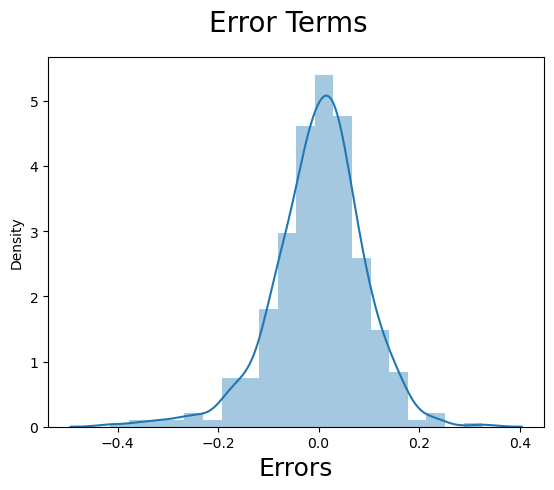

In [69]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

Error terms are following normal distribution

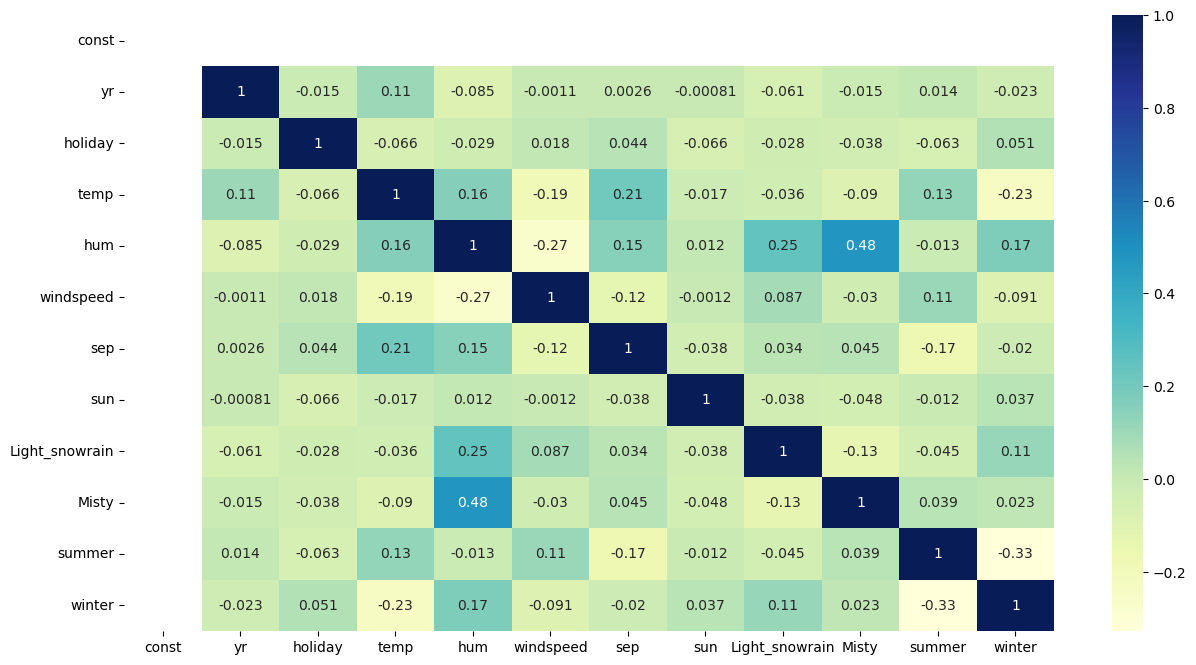

In [70]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()

R squared value for train prediction

In [71]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8368483290185641

# Making predictions

prediction value on dataset

In [72]:
num_vars = ["temp","atemp","hum","windspeed","cnt"]
df_test[num_cols] = scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [73]:
y_test = df_test.pop('cnt')
X_test = df_test

In [74]:
X_train_n.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'sep', 'sun',
       'Light_snowrain', 'Misty', 'summer', 'winter'],
      dtype='object')

In [75]:
col_n = [ 'yr', 'holiday', 'temp', 'windspeed', 'sep', 'sun', 'Light_snowrain', 'Misty', 'summer', 'winter']

X_test = X_test[col_n]

# Adding constant variable to test dataframe
X_test_l = sm.add_constant(X_test)

In [76]:
y_test_pred = lm5.predict(X_test_l)

R squared value for test prediction

In [77]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)


0.7958

# Model Evaluation

Text(0, 0.5, 'y_test_pred')

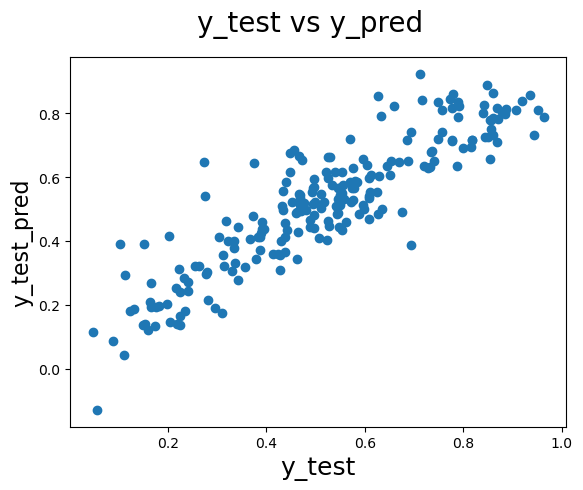

In [78]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [79]:
round(lm5.params,4)

const             0.1350
yr                0.2327
holiday          -0.1072
temp              0.5471
windspeed        -0.1531
sep               0.0992
sun              -0.0500
Light_snowrain   -0.2892
Misty            -0.0819
summer            0.0866
winter            0.1323
dtype: float64

### We can see that the equation of our best fitted line is:
cnt= 0.1350 + yr*0.2327 - holiday*0.1072 +temp*0.5471 - windspeed*0.1531 + sep*0.0992 - sun*0.0500 _ Light_snowrain*0.2892 - Misty*0.0819 + summer*0.0866 + winter*0.1323

In [80]:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.786


In [81]:
# lets print summary
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     256.0
Date:                Wed, 06 Nov 2024   Prob (F-statistic):          2.88e-189
Time:                        19:01:30   Log-Likelihood:                 500.84
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     499   BIC:                            -933.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1350      0.017      8.

Comparision between Training and Testing dataset:
 - Train dataset R^2          : 0.837   V/S   Test dataset R^2           : 0.7958
 - Train dataset Adjusted R^2 : 0.834   V/S   Test dataset Adjusted R^2  : 0.7944


Demand of bikes depend on 
- year
- holiday 
- temperature 
- windspeed 
- month of sep
- sunday 
- weather (Light_snowrain, Misty)
- season (summer , winter)